Kecepatan Kipas: 5.17


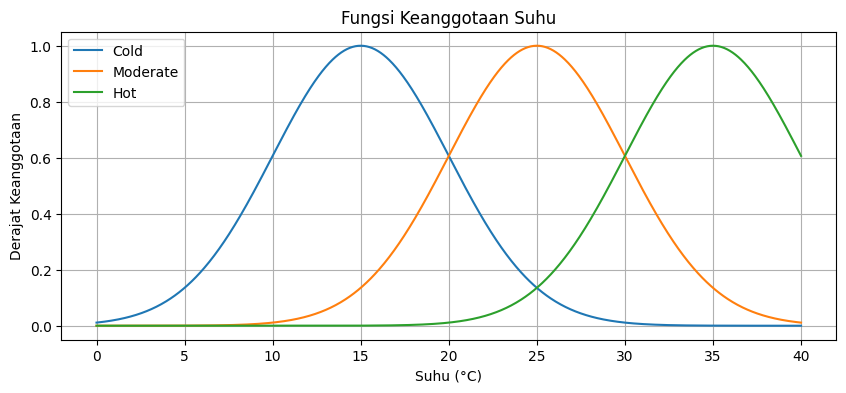

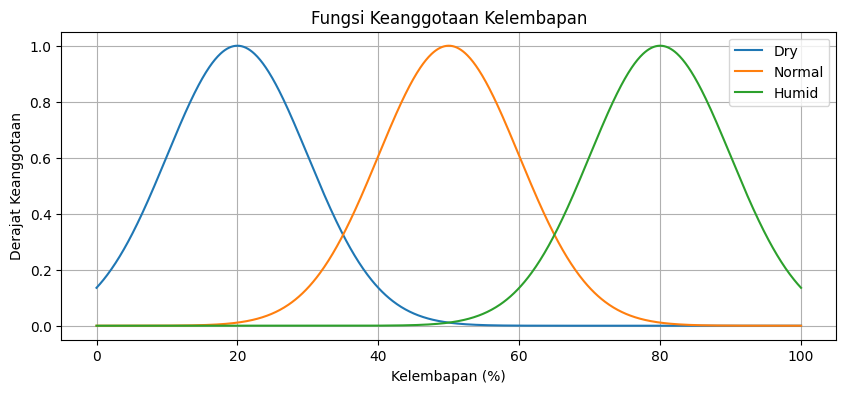

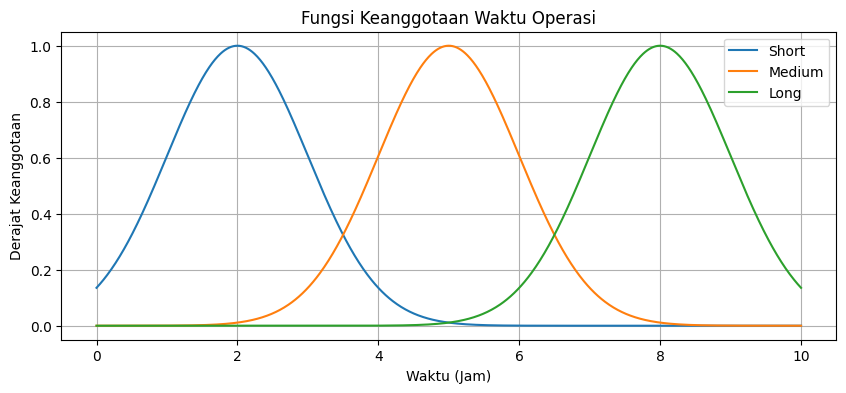

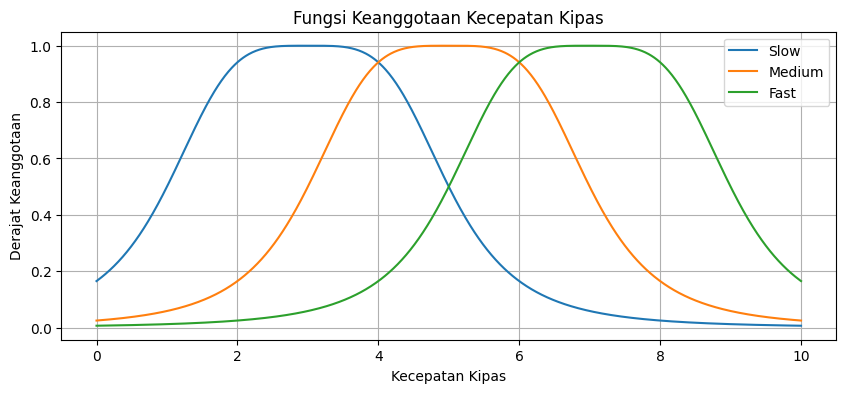

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi Keanggotaan Gaussian
class GaussianMembershipFunction:
    def __init__(self, name, mean, std_dev):
        self.name = name
        self.mean = mean
        self.std_dev = std_dev

    def calculate(self, x):
        return np.exp(-0.5 * ((x - self.mean) / self.std_dev) ** 2)

    def plot(self, x_range):
        y_values = [self.calculate(x) for x in x_range]
        plt.plot(x_range, y_values, label=self.name)

# Fungsi Keanggotaan Bell
class BellMembershipFunction:
    def __init__(self, name, a, b, c):
        self.name = name
        self.a = a
        self.b = b
        self.c = c

    def calculate(self, x):
        return 1 / (1 + abs((x - self.c) / self.a) ** (2 * self.b))

    def plot(self, x_range):
        y_values = [self.calculate(x) for x in x_range]
        plt.plot(x_range, y_values, label=self.name)

# Fuzzifikasi
class Fuzzification:
    def __init__(self, membership_functions):
        self.membership_functions = membership_functions

    def fuzzify(self, value):
        fuzzy_values = {}
        for mf in self.membership_functions:
            fuzzy_values[mf.name] = mf.calculate(value)
        return fuzzy_values

# Evaluasi Aturan Fuzzy
class RuleEvaluation:
    def __init__(self, rules):
        self.rules = rules

    def evaluate(self, fuzzy_inputs):
        rule_results = []
        for rule in self.rules:
            strength = min([fuzzy_inputs[param][level] for param, level in rule["conditions"].items()])
            rule_results.append((strength, rule["output"]))
        return rule_results

# Defuzzifikasi (Metode Centroid)
class CentroidDefuzzification:
    def __init__(self, output_functions):
        self.output_functions = output_functions

    def defuzzify(self, rules):
        numerator = 0.0
        denominator = 0.0
        x_range = np.linspace(0, 10, 1000)
        for x in x_range:
            aggregated_value = max(
                min(rule[0], self.output_functions[rule[1]].calculate(x)) for rule in rules
            )
            numerator += x * aggregated_value
            denominator += aggregated_value
        return numerator / denominator if denominator != 0 else 0.0

# Sistem Inferensi Fuzzy
class FuzzySystem:
    def __init__(self, inputs, rules, outputs):
        self.inputs = {name: Fuzzification(mfs) for name, mfs in inputs.items()}
        self.rules = RuleEvaluation(rules)
        self.defuzz = CentroidDefuzzification(outputs)

    def calculate(self, input_values):
        fuzzy_inputs = {name: fuzz.fuzzify(value) for name, fuzz in self.inputs.items() for value in [input_values[name]]}
        rule_results = self.rules.evaluate(fuzzy_inputs)
        return self.defuzz.defuzzify(rule_results)

# Fungsi Keanggotaan Input
temperature_mfs = [
    GaussianMembershipFunction("Cold", 15, 5),
    GaussianMembershipFunction("Moderate", 25, 5),
    GaussianMembershipFunction("Hot", 35, 5),
]

humidity_mfs = [
    GaussianMembershipFunction("Dry", 20, 10),
    GaussianMembershipFunction("Normal", 50, 10),
    GaussianMembershipFunction("Humid", 80, 10),
]

time_mfs = [
    GaussianMembershipFunction("Short", 2, 1),
    GaussianMembershipFunction("Medium", 5, 1),
    GaussianMembershipFunction("Long", 8, 1),
]

# Fungsi Keanggotaan Output
fan_speed_mfs = {
    "Slow": BellMembershipFunction("Slow", 2, 2, 3),
    "Medium": BellMembershipFunction("Medium", 2, 2, 5),
    "Fast": BellMembershipFunction("Fast", 2, 2, 7),
}

# Aturan Fuzzy
rules = [
    {"conditions": {"Temperature": "Cold", "Humidity": "Dry"}, "output": "Slow"},
    {"conditions": {"Temperature": "Moderate", "Humidity": "Normal", "Time": "Medium"}, "output": "Medium"},
    {"conditions": {"Temperature": "Hot", "Humidity": "Humid", "Time": "Long"}, "output": "Fast"},
]

# Inisialisasi Sistem
inputs = {
    "Temperature": temperature_mfs,
    "Humidity": humidity_mfs,
    "Time": time_mfs,
}
fuzzy_system = FuzzySystem(inputs, rules, fan_speed_mfs)

# Input Nilai
input_values = {"Temperature": 28, "Humidity": 60, "Time": 6}

# Hitung Output
fan_speed = fuzzy_system.calculate(input_values)

# Output
print(f"Kecepatan Kipas: {fan_speed:.2f}")

# Visualisasi Fungsi Keanggotaan
def plot_membership_functions():
    x_temp = np.linspace(0, 40, 1000)
    x_hum = np.linspace(0, 100, 1000)
    x_time = np.linspace(0, 10, 1000)
    x_speed = np.linspace(0, 10, 1000)

    plt.figure(figsize=(10, 4))
    for mf in temperature_mfs:
        mf.plot(x_temp)
    plt.title("Fungsi Keanggotaan Suhu")
    plt.xlabel("Suhu (\u00b0C)")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 4))
    for mf in humidity_mfs:
        mf.plot(x_hum)
    plt.title("Fungsi Keanggotaan Kelembapan")
    plt.xlabel("Kelembapan (%)")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 4))
    for mf in time_mfs:
        mf.plot(x_time)
    plt.title("Fungsi Keanggotaan Waktu Operasi")
    plt.xlabel("Waktu (Jam)")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 4))
    for mf in fan_speed_mfs.values():
        mf.plot(x_speed)
    plt.title("Fungsi Keanggotaan Kecepatan Kipas")
    plt.xlabel("Kecepatan Kipas")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid()
    plt.show()

# Menjalankan Visualisasi
plot_membership_functions()
